# 2 Show Dataset

## 2.1 Read the Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

false = False
true = True

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

# Read the formated dataset
train = pd.read_csv('/content/drive/My Drive/WORKS/data/Dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/WORKS/data/Dataset/test.csv')
valid = pd.read_csv('/content/drive/My Drive/WORKS/data/Dataset/valid.csv')

## 2.2 Show Dataset

In [0]:
valid.head(10)

,fact,accusation,criminals,punish_of_money,relevant_articles,death_penalty,imprisonment,life_imprisonment
0,公诉机关起诉指控，被告人张某某秘密窃取他人财物，价值2210元，××数额较大，其行为已触犯《...,['盗窃'],['张某某'],0,[264],False,2,False
1,孝昌县人民检察院指控：2014年1月4日，被告人邬某在孝昌县城区2路公交车上××被害人晏某白...,['盗窃'],['邬某'],1000,[264],False,4,False
2,广东省广州市南沙区人民检察院指控被告人罗某于2015年6月2日到广州市南沙区大岗镇人民路宇航...,['盗窃'],['罗某'],2000,[264],False,9,False
3,公诉机关指控，2016年3月3日18时许，被告人易某某行至达州市通川区大观园公交车站附近，扒...,['盗窃'],['易某某'],1000,[264],False,7,False
4,公诉机关指控：1.2015年8月20日晚上，被告人胡某甲至杭州市淳安县千岛湖镇新安东路112...,['盗窃'],['胡某甲'],0,[264],False,7,False
5,张家口经济开发区人民检察院指控：2015年6月27日晚，被告人任某在张家口经济开发区马路东燕...,['盗窃'],['任某'],8000,[264],False,7,False
6,公诉机关指控，2014年2月20日7时许，被告人祝某携带一把弹簧刀为作案工具，驾驶一辆男摩托...,['盗窃'],['祝某'],2000,[264],False,12,False
7,晋城市城区人民检察院指控：2015年4月，被告人宋1某在晋城市城区范围内，××停车场或路边轿...,['盗窃'],['宋1某'],0,[264],False,7,False
8,公诉机关指控，2015年11月6日17时许，被告人唐某来到南岸区南城大道卢某某经营的“母亲大...,['盗窃'],['唐某'],0,[264],False,7,False
9,经审理查明：一、2016年8月16日早上，被告人连某某在保定市满城区精灵网吧二楼包厢内××被...,['盗窃'],['连某某'],10000,[264],False,14,False


In [0]:
train.fact[1]

'公诉机关指控,2015年11月10日晚9时许，被告人李某的妹妹李某某与被害人华某某在桦川县悦来镇石锅烤肉吃饭时发生口角，华某某殴打李某某被他人拉开。后李某某打电话将此事告知李某。李某便开车接上李某某在悦来镇“0454饮吧”找到华某某并质问其因何殴打李某某，之后二人厮打在一起。李某用拳头、巴掌连续击打华某某脸部，致华受伤住院治疗。经桦川县公安局司法鉴定，华某某所受伤为轻伤二级。'

In [0]:
train.tail(10)

,fact,accusation,criminals,punish_of_money,relevant_articles,death_penalty,imprisonment,life_imprisonment
154581,经审理查明：2017年5月11日凌晨，被告人胡3某在永康市象珠镇官川村的池塘及周边农田抓获虎...,['非法[猎捕、杀害][珍贵、濒危]野生动物'],['胡3某'],5000,[341],False,18,False
154582,公诉机关指控，2015年12月下旬某日，青海省尖扎县人旦某（在逃）伙同被告人才某、朋毛才某为...,['非法[猎捕、杀害][珍贵、濒危]野生动物'],['才某'],0,[341],False,27,False
154583,公诉机关指控，2016年4月中旬至2016年5月初，被告人袁某伙同范某1（另处）、范某2（另...,['非法[猎捕、杀害][珍贵、濒危]野生动物'],['袁某'],1000,[341],False,12,False
154584,经审理查明，2014年1月27日，河南省林业厅发布通告，决定在河南省境内对所有野生鸟类实行禁...,['非法狩猎'],['李某'],0,[341],False,6,False
154585,经审理查明，2015年10月30日傍晚，被告人陈某驾驶摩托车，携带照明灯具，牵引猎狗，到达嘉...,['非法狩猎'],['陈某'],3000,[341],False,0,False
154586,经审理查明，2013年9月，被告人黄某从一陌生人处购得猎捕工具“电猫”一台，随即于每年的农历...,['非法狩猎'],['黄某'],0,[341],False,12,False
154587,歙县人民检察院指控：被告人叶某违反狩猎法规，在禁猎期内使用禁用的方法，猎捕安徽省二级保护的野...,['非法狩猎'],['叶某'],0,[341],False,0,False
154588,永平县人民检察院指控：2017年4月10日，被告人江天某携带单管猎枪、录音机等工具到永平县杉...,"['非法[持有、私藏][枪支、弹药]', '非法[猎捕、杀害][珍贵、濒危]野生动物']",['江天某'],10000,"[341, 128]",False,30,False
154589,神农架林区人民检察院指控：2015年11月中旬至12月，被告人朱某在神农架林区红坪镇红举村“...,['非法[猎捕、杀害][珍贵、濒危]野生动物'],['朱某'],4000,[341],False,48,False
154590,经审理查明：2014年8月25日晚19时至次日凌晨3时许，被告人黄某甲到江苏省沭阳县扎下镇明...,['非法狩猎'],['黄某甲'],0,[341],False,0,False


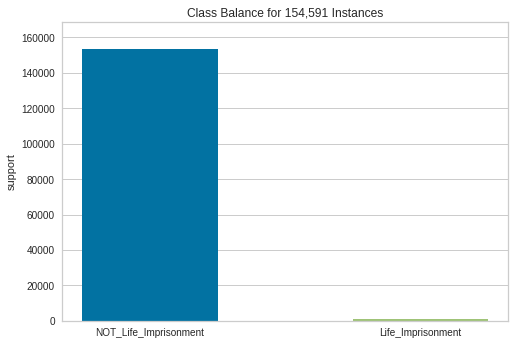

In [0]:
from yellowbrick.target import ClassBalance
import numpy as np

visualizer = ClassBalance(labels=["NOT_Life_Imprisonment", "Life_Imprisonment"])
visualizer.fit(train.life_imprisonment)
visualizer.poof()

# 3 Label the Dataset by BIO

## 3.1 Clean the Dataset

### 3.1.1 Set the stopwprds

In [0]:
stopwords = [line.strip() for line in open('/content/drive/My Drive/WORKS/data/ChineseSW_v1.txt',encoding='UTF-8').readlines()]

### 3.1.2 Prepare data

* Remove irrelvant words

In [0]:
import jieba
from string import punctuation
from itertools import chain

# Split text by keywords and remove irrelvant words
def cleanText(texts, stopwords, punctuation):
  jieba.load_userdict('/content/drive/My Drive/WORKS/data/LegalTerms.txt')
  jieba.load_userdict('/content/drive/My Drive/WORKS/data/Accusations.txt')
  tokenizedText = [jieba.lcut(text.replace(' ','')) for text in texts]
  newList = []

  for doc in tokenizedText:
    newList.append([token for token in doc if (token not in chain(punctuation, stopwords)and(len(token)>1))])
    
  return newList

* Construct Criminal Suspects, Accusations Lists

In [0]:
# Read Chinese name dataset
f1 = open("/content/drive/My Drive/WORKS/data/Names.txt","r")
names = f1.read()
f1.close() 
names="".join(names.split())

In [0]:
# Read accusation dataset
accList = []
for line in open("/content/drive/My Drive/WORKS/data/Accusations.txt","r"): 
  accList.append(line.replace('\n', '').replace('\r', ''))

In [0]:
#Build criminals dataset
def constructCri(str):
  criList = []
  for i in str:
    criList.append(i+'某')
    criList.append(i+'某某')
    criList.append(i+'XX')
    criList.append(i+'某X')
    criList.append(i+'X某')
  return criList

In [0]:
nameList = constructCri(names)

* Construct Other Legal Terms

In [0]:
# Read other legal items
f2 = open("/content/drive/My Drive/WORKS/data/LegalTerms.txt","r")
legalTerms = f2.read()
f2.close() 

### 3.1.3 Run the functions

In [0]:
# Clean test data
cleanedtAccText = cleanText(test.accusation, stopwords, punctuation)
cleanedtCriText = cleanText(test.criminals, stopwords+['某某'], punctuation)

# Clean valid data
cleanedvAccText = cleanText(valid.accusation, stopwords, punctuation)
cleanedvCriText = cleanText(valid.criminals, stopwords+['某某'], punctuation)

# Clean train data
cleanedAccText = cleanText(train.accusation, stopwords, punctuation)
cleanedCriText = cleanText(train.criminals, stopwords+['某某'], punctuation)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.962 seconds.
Prefix dict has been built successfully.


## 3.2 Sort out the Key Words
### 3.2.1 Intergration

In [0]:
# flag=0 fact, flag=1 number, other else
def integrate(list1,flag):
  d = []
  listOut = []

  if(flag==0):
    for i in range (len(list1)):
      list2 = list1[i]
      for j in range (len(list2)):
        d.append(str(list2[j]))
  elif(flag==1):
    for i in range (len(list1)):
      d.append(str("".join(str(list1[i]))))
  else:
    for i in range (len(list1)):
      d.append(str("".join(list1[i])))
  
  d =list(set(d))
  return d

In [0]:
# Test data
tacc = list(set(integrate(cleanedtAccText,0)+accList))
tcri = list(set(integrate(cleanedtCriText,3)+nameList))

# Valid data
vacc = list(set(integrate(cleanedvAccText,0)+accList))
vcri = list(set(integrate(cleanedvCriText,3)+nameList))

# Train data
acc = list(set(integrate(cleanedAccText,0)+accList))
cri = list(set(integrate(cleanedCriText,3)+nameList))

### 3.2.2 Store the Intermediary Data

In [0]:
import csv

def storeData(headers,d1,d2,filePath):
  f = open(filePath,'w',newline='',encoding="utf-8")
  fwrite = csv.writer(f) 
  fwrite.writerow(headers) #write column name

  if (d2==0): #Judge whether input need to be connected
    for item in d1:
      fwrite.writerow([item])
  else: 
    for item in range(len(d1)):
      fwrite.writerow((d1[item],d2[item]))
      
  f.close()

In [0]:
path = '/content/drive/My Drive/WORKS/data/CrimeData/'
# Store test data in csv format 
storeData(['Accusations'],tacc,0,(path+'testAccusations.csv'))
storeData(['Criminals'],tcri,0,(path+'testCriminals.csv'))

# Store valid data in csv format 
storeData(['Accusations'],vacc,0,(path+'validAccusations.csv'))
storeData(['Criminals'],vcri,0,(path+'validCriminals.csv'))

# Store train data in csv format 
storeData(['Accusations'],acc,0,(path+'trainAccusations.csv'))
storeData(['Criminals'],cri,0,(path+'trainCriminals.csv'))

### 3.2.3 Show Results

In [0]:
# Read keyword text in test dataset
testCriminals = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/testCriminals.csv')
testAccusations = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/testAccusations.csv')

# Read keyword text in valid dataset
validCriminals = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/validCriminals.csv')
validAccusations = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/validAccusations.csv')

# Read keyword text in train dataset
trainCriminals = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/trainCriminals.csv')
trainAccusations = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/trainAccusations.csv')

In [0]:
testCriminals.head(10)

,Criminals
0,NaN
1,长某某
2,龙某X
3,勾某某
4,通某X
5,延某某
6,邬X某
7,东某X
8,山XX
9,古某


## 3.3 Labeling

### 3.3.1 Give Tags to Key Words

* Labeling

In [0]:
def labelFacts(list,tag): 
  listOut=[] 
  for i in range (len(list)):
    if(tag==1):
      listOut.append('O') # Other Words
    else:
      if i==0:
        listOut.append('B-'+ tag) # Begin of Keywords    
      else:
        listOut.append('I-'+ tag) # Intermediate of Keywords

  return listOut

* Compare with the Keywords List

In [0]:
def factBIO(factText,acc,cri):
  labelList = []
  facts=[]

  # Load the entity dictionary
  jieba.load_userdict(acc)
  jieba.load_userdict(cri)
  jieba.load_userdict(legalTerms)

  for i in factText:
    tokenizedText = jieba.lcut(i)
    text = []
    
    for doc in tokenizedText:
      text.append([token for token in doc if token not in stopwords])
      
    for j in text: # Classify keywords
      j=''.join(j)
      facts.extend(j)
      if len(j) > 1:
        if j in tacc:
          labelList.extend(labelFacts(j,'Accusation'))
        elif j in tcri:
          labelList.extend(labelFacts(j,'Criminals'))
        elif j in legalTerms:
          labelList.extend(labelFacts(j,'legalTerms'))
        else:
          labelList.extend(labelFacts(j,1))
      else:
          labelList.extend(labelFacts(j,1))
    
  return facts,labelList

* Run functions

In [0]:
tfacts,tlabelList=factBIO(test.fact,tacc,tcri)
vfacts,vlabelList=factBIO(valid.fact,vacc,vcri)
trainfacts,trainlabelList=factBIO(train.fact,acc,cri)

### 3.3.2 Store the Result

In [0]:
import os
def storage(fileName,data,label):
# Store data in (Fact+Label) format
  with open(fileName,"w") as f:
    for i in range(len(data)):
      f.writelines(data[i]+' '+label[i])
      f.writelines("\n")

In [0]:
# Store in txt format
storage((path+'testLabeled.txt'),tfacts,tlabelList)
storage((path+'validLabeled.txt'),vfacts,vlabelList)
storage((path+'trainLabeled.txt'),trainfacts,trainlabelList)

In [0]:
# Store in csv format
storeData(['Facts','Label'],tfacts,tlabelList,(path+'testLabeled.csv'))
storeData(['Facts','Label'],vfacts,vlabelList,(path+'validLabeled.csv'))
storeData(['Facts','Label'],trainfacts,trainlabelList,(path+'trainLabeled.csv'))

### 3.3.3 Show Labeled Result

In [0]:
import pandas as pd
import numpy as np

# Read the labeled dataset
testLabeled = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/testLabeled.csv')
validLabeled = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/validLabeled.csv')
trainLabeled = pd.read_csv('/content/drive/My Drive/WORKS/data/CrimeData/trainLabeled.csv')

In [0]:
testLabeled.head(50)

,Facts,Label
0,公,B-legalTerms
1,诉,I-legalTerms
2,机,I-legalTerms
3,关,I-legalTerms
4,指,B-legalTerms
5,控,I-legalTerms
6,：,O
7,2,O
8,0,O
9,1,O


In [0]:
validLabeled.head(30)

,Facts,Label
0,公,B-legalTerms
1,诉,I-legalTerms
2,机,I-legalTerms
3,关,I-legalTerms
4,起,B-legalTerms
5,诉,I-legalTerms
6,指,B-legalTerms
7,控,I-legalTerms
8,，,O
9,被,B-legalTerms


In [0]:
trainLabeled.head(50)

,Facts,Label
0,昌,O
1,宁,O
2,县,O
3,人,B-legalTerms
4,民,I-legalTerms
5,检,I-legalTerms
6,察,I-legalTerms
7,院,I-legalTerms
8,指,B-legalTerms
9,控,I-legalTerms
